In [1]:
import os
import numpy as np
import pandas as pd
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVtrain_5FP_fold5_1.csv') #เปลี่ยนไฟล์
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.257257,0.061749,-0.204598,-0.051490,-0.047862,-0.132887,-0.188072,0.558547,-0.078761,0.760282,...,-0.145737,0.948394,0.434279,0.806325,0.381356,0.663624,Abnormal,P31,FP-B,AB01
1,0.058870,0.464437,0.304008,-0.116920,0.049338,0.123701,0.367074,0.514198,-0.128541,-0.082845,...,-0.146912,0.539089,0.558325,-0.000187,-0.124831,0.505162,Abnormal,P1,FP-A,AB01
2,0.156821,0.240385,0.474554,0.068575,0.279763,0.286816,0.682549,0.293847,-0.087209,-0.166734,...,-0.128081,0.560009,0.727909,-0.047264,-0.219212,1.207271,Abnormal,P2,FP-A,AB01
3,0.008052,-0.055255,-0.151278,-0.064351,-0.145564,-0.039949,-0.175301,0.392501,-0.152118,0.522696,...,-0.198420,0.293668,0.507210,0.522763,0.410721,0.426186,Abnormal,P42,FP-B,AB01
4,0.317210,0.160467,-0.202628,-0.079476,-0.168684,-0.141200,-0.188657,0.469917,-0.075971,1.081229,...,-0.214436,0.517513,0.474510,0.769380,0.213803,0.458324,Abnormal,P41,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.252896,-0.072342,-0.218846,-0.139483,-0.107293,-0.168746,-0.194549,0.303148,-0.134796,0.537575,...,-0.148964,0.715010,0.535276,0.310100,-0.110192,0.283656,Normal,P32,FP-B,Normal
4597,-0.086143,-0.032120,-0.178661,-0.139105,-0.044913,-0.148063,-0.180327,0.270920,-0.155126,0.716253,...,-0.165490,0.173388,0.583377,0.319975,0.260338,0.585618,Normal,P42,FP-B,Normal
4598,-0.195856,-0.174498,0.030519,0.017471,-0.147183,-0.087018,0.100809,-0.124989,0.533784,-0.163847,...,0.235412,-0.150752,-0.143022,-0.088221,0.279927,-0.168929,Normal,P52,FP-C,Normal
4599,-0.204146,-0.191523,-0.086852,0.244418,0.058354,-0.216180,-0.147212,-0.018103,0.217966,0.053961,...,0.290976,-0.131064,-0.131687,-0.047006,0.026086,-0.161586,Normal,P61,FP-C,Normal


In [2]:
X = dataframe.iloc[:,0:2048]
y = dataframe.iloc[:,2051]
print(X.shape)
print(y.shape)

(4601, 2048)
(4601,)


In [3]:
y[0]

'AB01'

# Random Forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [5]:
n_estimators = [400]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100] 

forest = RandomForestClassifier(random_state = 1)


hyperF ={'n_estimators' : n_estimators, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
# hyperF ={'max_depth' : max_depth, 'min_samples_split' : min_samples_split}

gridF = GridSearchCV(forest, hyperF, cv = 10, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [6]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(bestF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.677462,0.012287,"{'max_depth': 5, 'min_samples_split': 2, 'n_es..."
1,0.677028,0.012122,"{'max_depth': 5, 'min_samples_split': 5, 'n_es..."
2,0.677679,0.011929,"{'max_depth': 5, 'min_samples_split': 10, 'n_e..."
3,0.676809,0.012861,"{'max_depth': 5, 'min_samples_split': 15, 'n_e..."
4,0.672681,0.011965,"{'max_depth': 5, 'min_samples_split': 100, 'n_..."
5,0.692895,0.008397,"{'max_depth': 8, 'min_samples_split': 2, 'n_es..."
6,0.691590,0.011078,"{'max_depth': 8, 'min_samples_split': 5, 'n_es..."
7,0.691373,0.010684,"{'max_depth': 8, 'min_samples_split': 10, 'n_e..."
8,0.690721,0.010331,"{'max_depth': 8, 'min_samples_split': 15, 'n_e..."
9,0.681592,0.011754,"{'max_depth': 8, 'min_samples_split': 100, 'n_..."


In [7]:
# examine the first result
print("**examine the first result","\n")

print(bestF.cv_results_['params'][0])
print(bestF.cv_results_['mean_test_score'][0])

# print the array of mean scores only
print("\n","**print the array of mean scores only","\n")

grid_mean_scores = bestF.cv_results_['mean_test_score']
print(grid_mean_scores)

# examine the best model
print("\n","**examine the best model","\n")

print(bestF.best_score_)
print(bestF.best_params_)
print(bestF.best_estimator_)

**examine the first result 

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 400}
0.6774620390455531

 **print the array of mean scores only 

[0.67746204 0.67702773 0.67767943 0.67680939 0.67268085 0.69289494
 0.69158964 0.6913732  0.69072102 0.68159247 0.70549939 0.70419504
 0.70180562 0.70028247 0.68485193 0.70745544 0.70810714 0.70615062
 0.70332642 0.6855041  0.71028058 0.70810761 0.70549892 0.70462935
 0.68506932]

 **examine the best model 

0.7102805809676507
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
RandomForestClassifier(max_depth=30, n_estimators=400, random_state=1)


In [8]:
#Print the tured parameters and score
print("Tuned Decision Tree Parameters: {}".format(bestF.best_params_))
print("Best score is {}".format(bestF.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 400}
Best score is 0.7102805809676507


# setting parameters

In [9]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 30, n_estimators = 400, min_samples_split = 2) #เปลี่ยนตาม cell 8
             
modelOpt = forestOpt.fit(X, y)# 

In [10]:
dataframe = pd.read_csv( '/home/yupaporn/codes/USAI/FVvalidation_5FP_RF_5FP_fold5_1.csv') #เปลี่ยนชื่อไฟล์ Validation

In [11]:
dataframe

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0,-0.187529,-0.141496,0.059408,-0.085317,-0.061441,-0.036807,0.361733,-0.046993,-0.026996,...,0.081446,-0.164327,-0.105913,-0.147562,0.032943,-0.160884,Abnormal,P52,FP-C,AB01
1,1,0.174355,0.148872,0.131622,0.119818,0.453863,0.242727,0.298383,0.111581,-0.144613,...,0.225444,0.457006,0.005407,-0.115241,-0.199287,0.967683,Abnormal,P1,FP-A,AB02
2,2,0.067647,0.297012,0.815936,0.138661,0.242373,0.598718,0.950902,0.299606,-0.013170,...,-0.093067,0.380495,0.460630,-0.135823,-0.199475,1.037048,Abnormal,P2,FP-A,AB02
3,3,-0.172844,-0.129973,0.161890,0.097445,-0.163525,-0.165896,0.385491,-0.174794,0.039391,...,0.404829,-0.187930,-0.178770,-0.104841,0.203931,-0.154793,Abnormal,P51,FP-C,AB02
4,4,-0.201331,-0.025423,0.562680,0.428355,0.057749,0.021166,0.967933,-0.113979,0.120943,...,0.426077,-0.181371,-0.193593,-0.017496,-0.076928,-0.160144,Abnormal,P42,FP-B,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,651,-0.192995,-0.196337,-0.134284,0.098834,-0.152699,-0.172450,-0.032410,-0.081889,0.132783,...,0.577732,-0.207290,-0.205079,-0.105243,0.176994,-0.157321,Normal,P61,FP-C,Normal
652,652,-0.162739,-0.171227,-0.048529,0.323934,0.082326,-0.216421,0.214099,-0.145684,0.394911,...,0.473510,-0.201952,-0.066799,-0.179759,-0.088749,-0.150173,Normal,P62,FP-C,Normal
653,653,0.494367,-0.075560,0.021499,0.104018,-0.133141,0.179355,0.302191,-0.026367,-0.189166,...,0.270599,-0.030763,-0.022033,0.027236,-0.095076,0.346952,Normal,P71,FP-D,Normal
654,654,0.458164,-0.039712,0.244053,0.478749,-0.150483,0.071534,0.444147,-0.230274,-0.100825,...,0.715069,-0.045138,-0.077578,-0.121694,-0.163438,0.534781,Normal,P72,FP-D,Normal


In [12]:
X_test = dataframe.iloc[:,1:2049]
y_test = dataframe.iloc[:,2052]
print(X_test.shape)
print(y_test.shape)

(656, 2048)
(656,)


In [13]:
y_test

0        AB01
1        AB02
2        AB02
3        AB02
4        AB02
        ...  
651    Normal
652    Normal
653    Normal
654    Normal
655    Normal
Name: Sub_class, Length: 656, dtype: object

In [14]:
y_pred = modelOpt.predict(X_test)

In [15]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[  0   3   0   0   0   0   0   0   0   0   0   0   0   0  33]
 [  0  13   0   0   0   0   0   0   0   0   0   0   0   0  19]
 [  1   2   0   0   0   0   0   0   0   0   0   0   0   0   9]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  18]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  14]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  11]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0  15]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  16]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  12]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  10]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  13  15]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0 428]]
              precision    recall  f1-score   support


/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 21.5, 'Predicted label')

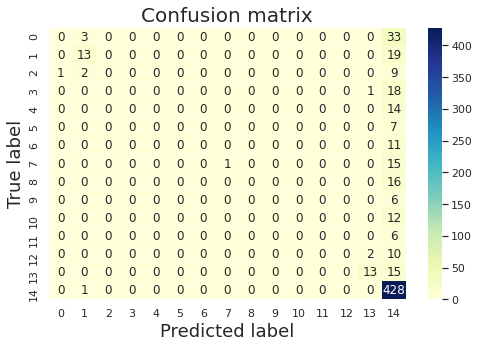

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [17]:
#TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
#print(TN, FP, FN, TP)

135 93 24 407


# Save Model

In [17]:
#Save Model

import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_5/models/')
filename = "modelrf_5FP_15AB_fold5_1.pkl" #เปลี่ยนชื่อไฟล์ Train random forest
with open(filename, 'wb') as file:
    pickle.dump(modelOpt, file)

In [ ]:
# #load model

# with open(filename, 'rb') as file:
#     model = pickle.load(file)